In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv(r'C:\Users\rajat\OneDrive\Desktop\DS GenAI\Data Files\Visadataset.csv')
cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [3]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
visa_df['continent']

0          Asia
1          Asia
2          Asia
3          Asia
4        Africa
          ...  
25475      Asia
25476      Asia
25477      Asia
25478      Asia
25479      Asia
Name: continent, Length: 25480, dtype: object

**Unique**

In [8]:
visa_df['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [10]:
visa_df['continent'].nunique()

6

**Frequency Tables**

- continent column has some unique continent names

- total data size is 25479 observations

- we will create a table having continents and number of applicants from each continent

**Step-1:Total Data**

In [14]:
visa_df['continent']

0          Asia
1          Asia
2          Asia
3          Asia
4        Africa
          ...  
25475      Asia
25476      Asia
25477      Asia
25478      Asia
25479      Asia
Name: continent, Length: 25480, dtype: object

**Step-2:Select particular column**

In [17]:
visa_df['continent']

0          Asia
1          Asia
2          Asia
3          Asia
4        Africa
          ...  
25475      Asia
25476      Asia
25477      Asia
25478      Asia
25479      Asia
Name: continent, Length: 25480, dtype: object

**Step-3:Equating a specific label**

In [20]:
condition=visa_df['continent']=='Asia'
condition

0         True
1         True
2         True
3         True
4        False
         ...  
25475     True
25476     True
25477     True
25478     True
25479     True
Name: continent, Length: 25480, dtype: bool

**Step-4:Pass the true condition to entire dataframe**

In [23]:
visa_df[condition]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [25]:
len(visa_df[condition])

16861

In [27]:
continents=visa_df['continent'].unique()
no_of_applications=[]
for i in continents:
    con=visa_df['continent']==i
    count=len(visa_df[con])
    no_of_applications.append(count)

In [29]:
no_of_applications

[16861, 551, 3292, 3732, 852, 192]

In [31]:
continent_df=pd.DataFrame({'Continent': continents,'No of Applications': no_of_applications})
continent_df.to_csv('continent_df.csv',index=False)

In [33]:
count=[]       # change-1
for col in cat[1:]:
    labels=visa_df[col].unique()
    for label in labels:
        con=visa_df[col]==label
        count.append(len(visa_df[con]))
            
    df=result=pd.DataFrame(zip(labels,count),columns=[col,'count'])
    df.to_csv(f'{col}_df.csv',index=False)  

In [35]:
continent_vc=visa_df['continent'].value_counts()
continent_vc

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [37]:
keys=continent_vc.keys()

In [39]:
values=continent_vc.values

In [41]:
continent_df=pd.DataFrame(zip(keys,values),columns=['Continent','Count'])
continent_df

,Continent,Count
0,Asia,16861
1,Europe,3732
2,North America,3292
3,South America,852
4,Africa,551
5,Oceania,192


In [43]:
continent_vc=visa_df['continent'].value_counts()
keys=continent_vc.keys()
values=continent_vc.values
continent_df=pd.DataFrame(zip(keys,values),columns=['Continent','No. of applicants'])
continent_df.to_csv('Continent_df.csv',index=False)

In [45]:
pd.read_csv('continent_df.csv')

,Continent,No. of applicants
0,Asia,16861
1,Europe,3732
2,North America,3292
3,South America,852
4,Africa,551
5,Oceania,192


In [47]:
for i in cat[1:]:
    vc=visa_df[i].value_counts()
    keys=vc.keys()
    values=vc.values
    df=pd.DataFrame(zip(keys,values),columns=[f'{i}','count'])
    print(df)
    print('====================================================================================================================')

       continent  count
0           Asia  16861
1         Europe   3732
2  North America   3292
3  South America    852
4         Africa    551
5        Oceania    192
  education_of_employee  count
0            Bachelor's  10234
1              Master's   9634
2           High School   3420
3             Doctorate   2192
  has_job_experience  count
0                  Y  14802
1                  N  10678
  requires_job_training  count
0                     N  22525
1                     Y   2955
  region_of_employment  count
0            Northeast   7195
1                South   7017
2                 West   6586
3              Midwest   4307
4               Island    375
  unit_of_wage  count
0         Year  22962
1         Hour   2157
2         Week    272
3        Month     89
  full_time_position  count
0                  Y  22773
1                  N   2707
  case_status  count
0   Certified  17018
1      Denied   8462


- Step-1: I created a folder i.e. freq_table

- Step-2: I got the directory path
    - new_directory=python_location + folder_name

- Step-3: I got the full path 
    - new_directory + col_name.csv

**Step-1:Create a folder**

In [51]:
import os
folder_name='freq_tables'
try:
    os.makedirs(folder_name)
except Exception as e:
    print(e)

[WinError 183] Cannot create a file when that file already exists: 'freq_tables'


**Step-2:New Directory**

In [54]:
cwd=os.getcwd()
nwd=os.path.join(cwd,folder_name)
nwd

'C:\\Users\\rajat\\OneDrive\\Desktop\\DS GenAI\\Data Analytics\\EDA\\freq_tables'

**Step-3:Full paths**

In [57]:
for i in cat[1:]:
    new=f'{nwd}\\{i}.csv'
    print(new)

C:\Users\rajat\OneDrive\Desktop\DS GenAI\Data Analytics\EDA\freq_tables\continent.csv
C:\Users\rajat\OneDrive\Desktop\DS GenAI\Data Analytics\EDA\freq_tables\education_of_employee.csv
C:\Users\rajat\OneDrive\Desktop\DS GenAI\Data Analytics\EDA\freq_tables\has_job_experience.csv
C:\Users\rajat\OneDrive\Desktop\DS GenAI\Data Analytics\EDA\freq_tables\requires_job_training.csv
C:\Users\rajat\OneDrive\Desktop\DS GenAI\Data Analytics\EDA\freq_tables\region_of_employment.csv
C:\Users\rajat\OneDrive\Desktop\DS GenAI\Data Analytics\EDA\freq_tables\unit_of_wage.csv
C:\Users\rajat\OneDrive\Desktop\DS GenAI\Data Analytics\EDA\freq_tables\full_time_position.csv
C:\Users\rajat\OneDrive\Desktop\DS GenAI\Data Analytics\EDA\freq_tables\case_status.csv


In [59]:
for i in cat[1:]:
    file_name=f'{i}_df.csv'
    path=os.path.join(nwd,file_name)
    print(path)

C:\Users\rajat\OneDrive\Desktop\DS GenAI\Data Analytics\EDA\freq_tables\continent_df.csv
C:\Users\rajat\OneDrive\Desktop\DS GenAI\Data Analytics\EDA\freq_tables\education_of_employee_df.csv
C:\Users\rajat\OneDrive\Desktop\DS GenAI\Data Analytics\EDA\freq_tables\has_job_experience_df.csv
C:\Users\rajat\OneDrive\Desktop\DS GenAI\Data Analytics\EDA\freq_tables\requires_job_training_df.csv
C:\Users\rajat\OneDrive\Desktop\DS GenAI\Data Analytics\EDA\freq_tables\region_of_employment_df.csv
C:\Users\rajat\OneDrive\Desktop\DS GenAI\Data Analytics\EDA\freq_tables\unit_of_wage_df.csv
C:\Users\rajat\OneDrive\Desktop\DS GenAI\Data Analytics\EDA\freq_tables\full_time_position_df.csv
C:\Users\rajat\OneDrive\Desktop\DS GenAI\Data Analytics\EDA\freq_tables\case_status_df.csv


In [60]:
folder_name='Visa'
try:
    os.makedirs(folder_name)
except Exception as e:
    print(e)

cwd=os.getcwd()
nwd=os.path.join(cwd,folder_name)

for i in cat[1:]:
    vc=visa_df[i].value_counts()
    keys=vc.keys()
    values=vc.values
    vc_df=pd.DataFrame(zip(keys,values),columns=[f'{i}','Count'])

    file_name=f'{i}_df.csv'
    path=os.path.join(nwd,file_name)

    vc_df.to_csv(path,index=False)

[WinError 183] Cannot create a file when that file already exists: 'Visa'


In [61]:
nwd=os.path.join(cwd,'freq_tables')

for i in cat[1:]:
    vc=visa_df[i].value_counts()
    keys=vc.keys()
    values=vc.values
    vc_df=pd.DataFrame(zip(keys,values),columns=[f'{i}','Count'])

    file_name=f'{i}_df.csv'
    path=os.path.join(nwd,file_name)

    vc_df.to_csv(path,index=False)

**Group By**

- In SQL we have a Group By option

- Similarly we have it in python also

- First it'll group the similar labels together

- On that we can perform any math operations

In [63]:
visa_df.groupby('continent').size()

continent
Africa             551
Asia             16861
Europe            3732
North America     3292
Oceania            192
South America      852
dtype: int64

In [65]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [69]:
list(visa_df.groupby('continent'))

[('Africa',
           case_id continent education_of_employee has_job_experience  \
  4         EZYV05    Africa              Master's                  Y   
  18        EZYV19    Africa              Master's                  Y   
  74        EZYV75    Africa              Master's                  Y   
  194      EZYV195    Africa              Master's                  Y   
  242      EZYV243    Africa            Bachelor's                  N   
  ...          ...       ...                   ...                ...   
  25385  EZYV25386    Africa             Doctorate                  Y   
  25408  EZYV25409    Africa              Master's                  Y   
  25443  EZYV25444    Africa            Bachelor's                  N   
  25446  EZYV25447    Africa              Master's                  N   
  25474  EZYV25475    Africa             Doctorate                  N   
  
        requires_job_training  no_of_employees  yr_of_estab  \
  4                         N             1082

**Bar Chart**

- bar chart under teh matplotlib

- plt.bar

- bar chart needs class names and class frequency

- class names we can get from value counts

- class frequency we can get from value count

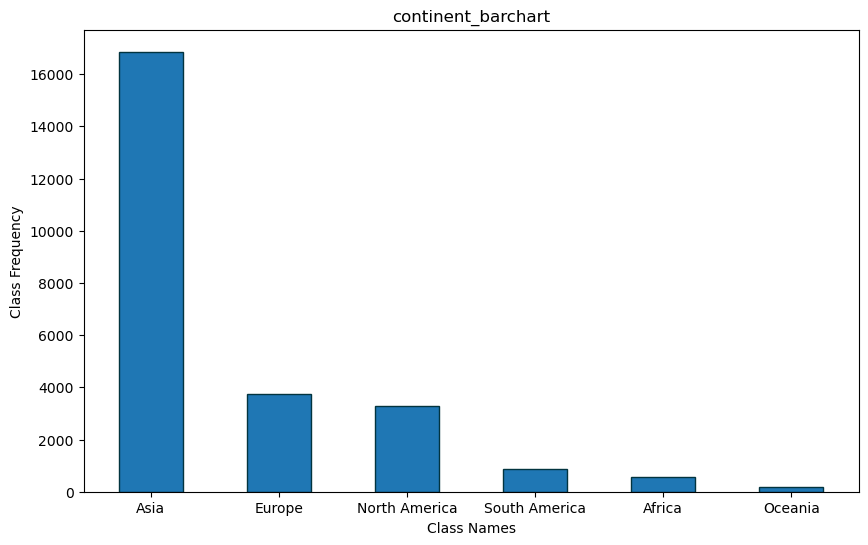

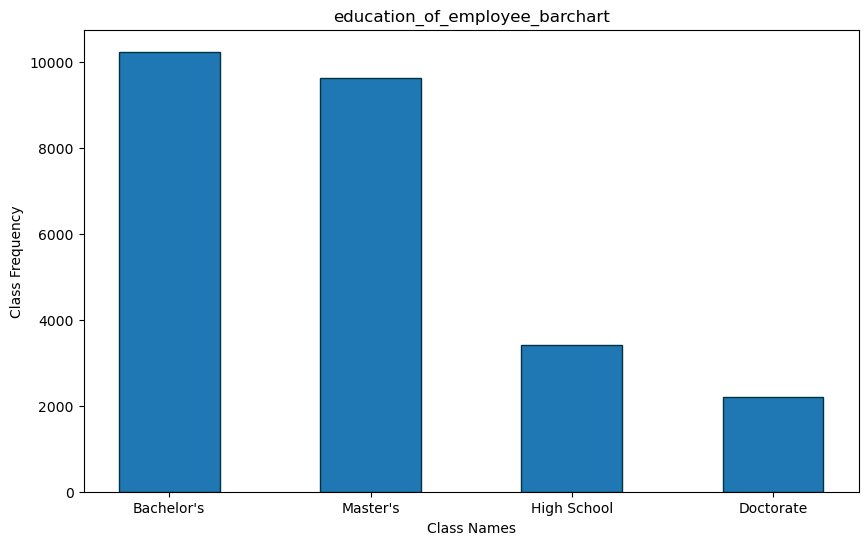

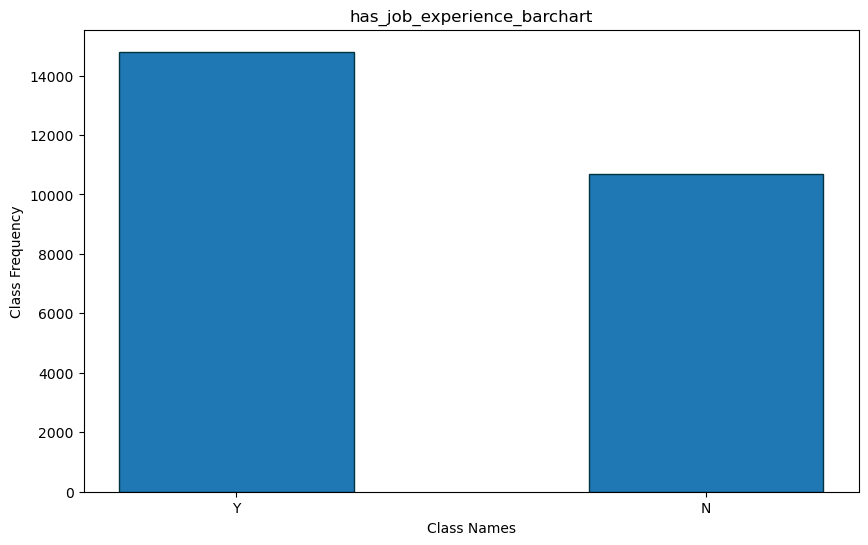

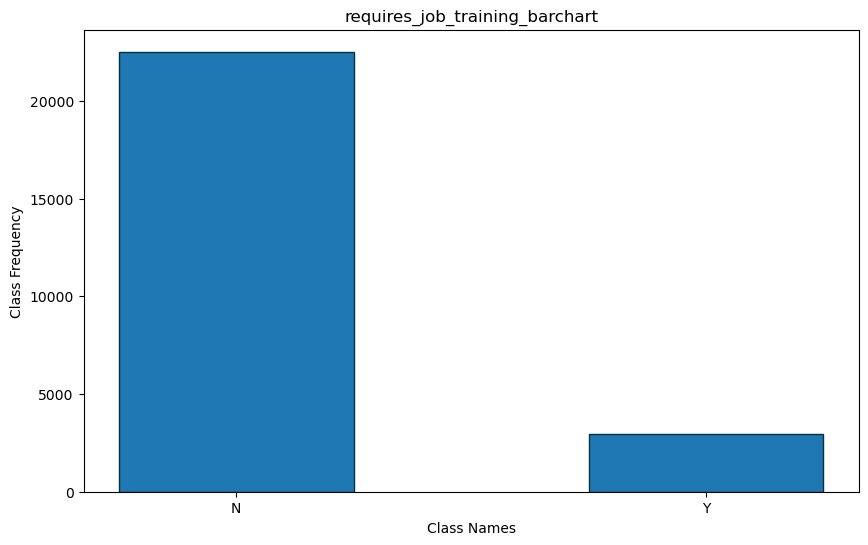

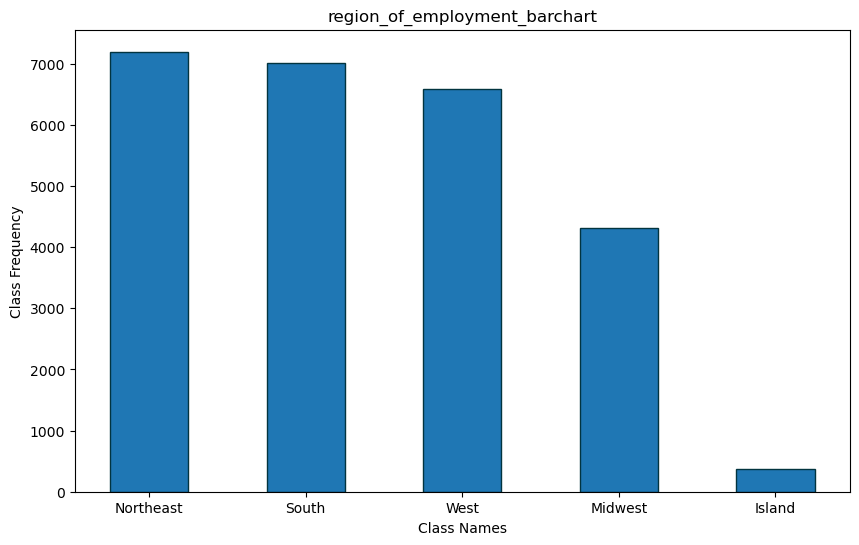

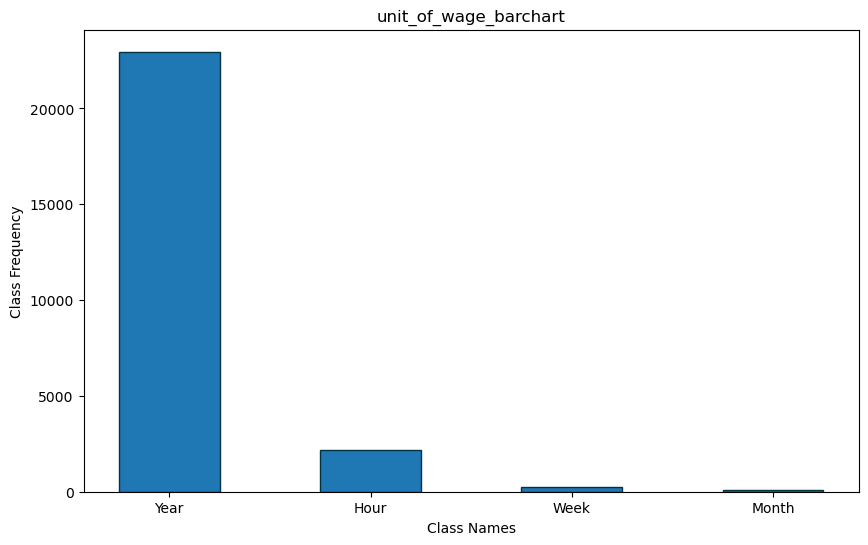

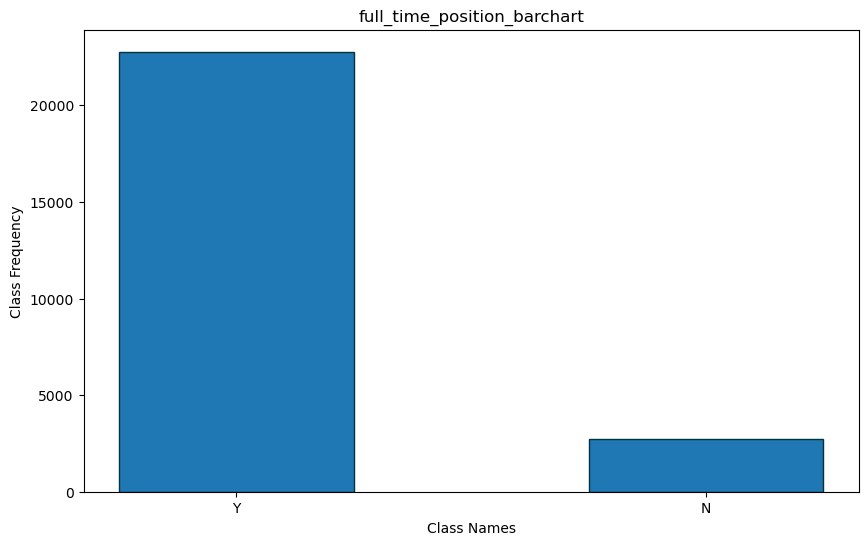

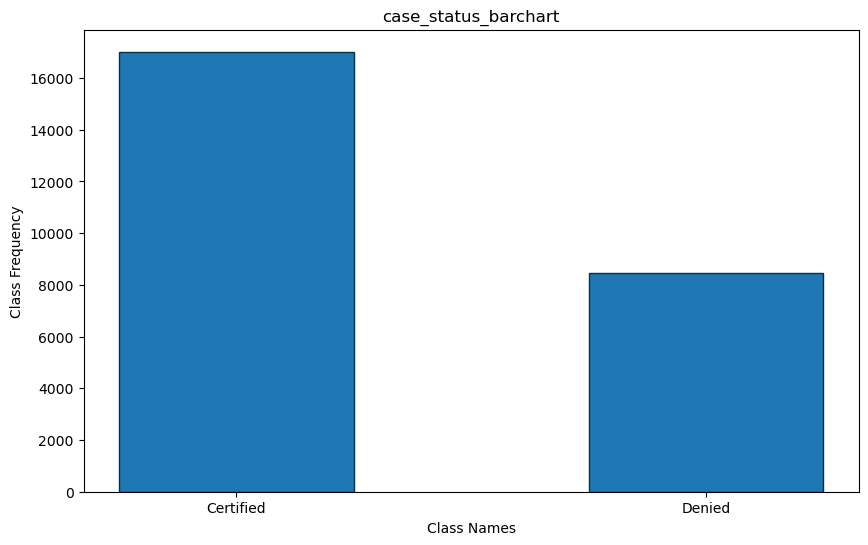

In [75]:
for i in cat[1:]:
    item=visa_df[i].value_counts()
    keys=item.keys()
    values=item.values
    plt.figure(figsize=(10,6))
    x_axis=plt.bar(x=keys,height=values,width=0.5,align='center',edgecolor='#02343F')
    plt.xlabel('Class Names')
    plt.ylabel('Class Frequency')
    plt.title(f'{i}_barchart')
    plt.savefig(f'{i}_barchart.png')
    plt.show()

In [157]:
continent=visa_df['continent'].value_counts()
keys=continent.keys()
keys
values=continent.values
values

array([16861,  3732,  3292,   852,   551,   192], dtype=int64)

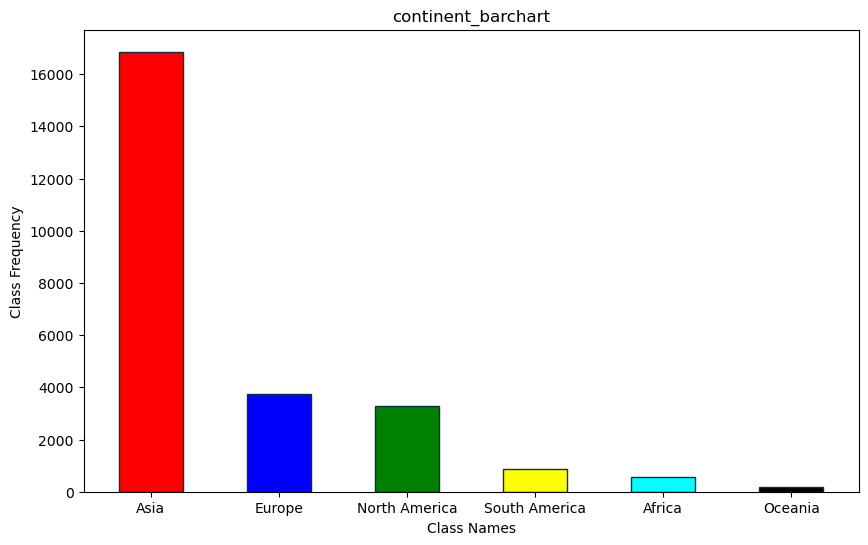

In [158]:
plt.figure(figsize=(10,6))
colors=['red','blue','green','yellow','cyan','black']
x_axis=plt.bar(x=keys,height=values,width=0.5,align='center',color=colors,edgecolor='#02343F')
plt.xlabel('Class Names')
plt.ylabel('Class Frequency')
plt.title('continent_barchart')
plt.savefig('continent_barchart.png')
plt.savefig('continent_barchart.jpeg')
plt.show()


**Sub plots**

<Axes: >

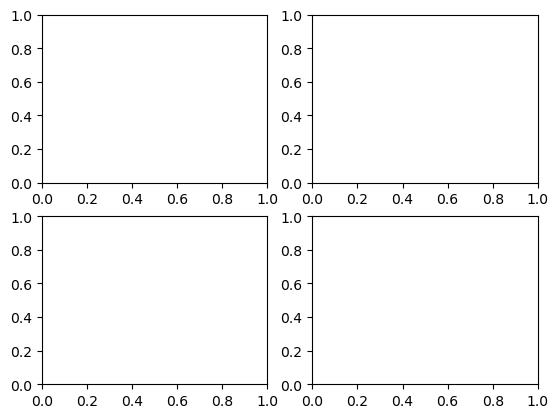

In [178]:
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)

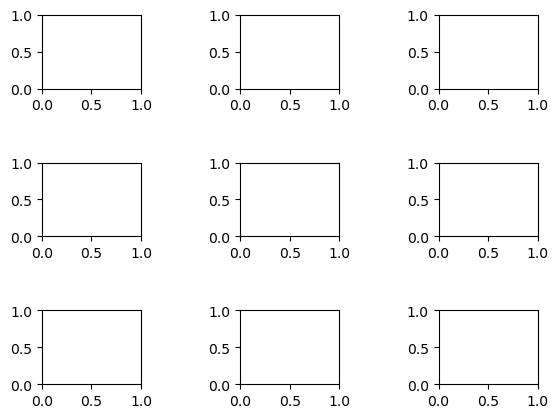

In [194]:
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.subplots_adjust(wspace=1,hspace=1)

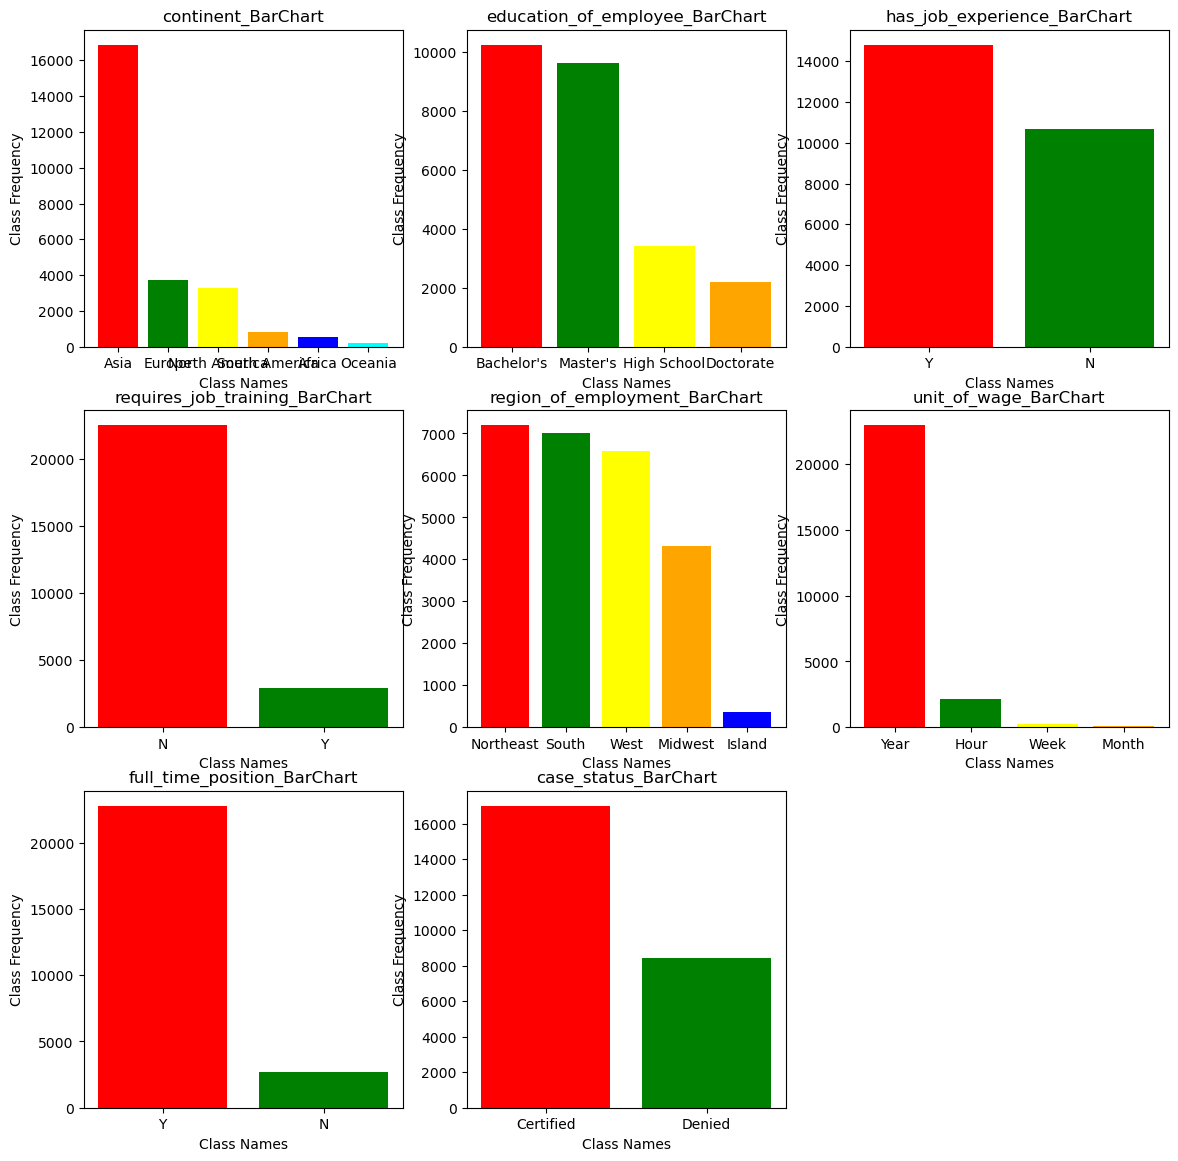

In [77]:
colors=['Red','Green','Yellow','Orange','Blue','Cyan']
plt.figure(figsize=(14,14))
for i in range(1,len(cat)):
    class_names=visa_df[cat[i]].value_counts().keys()
    class_fre=visa_df[cat[i]].value_counts().values
    plt.subplot(3,3,i)
    plt.bar(class_names,class_fre,color=colors)
    plt.xlabel('Class Names')
    plt.ylabel('Class Frequency')
    plt.title(f'{cat[i]}_BarChart')

**Pie Chart**

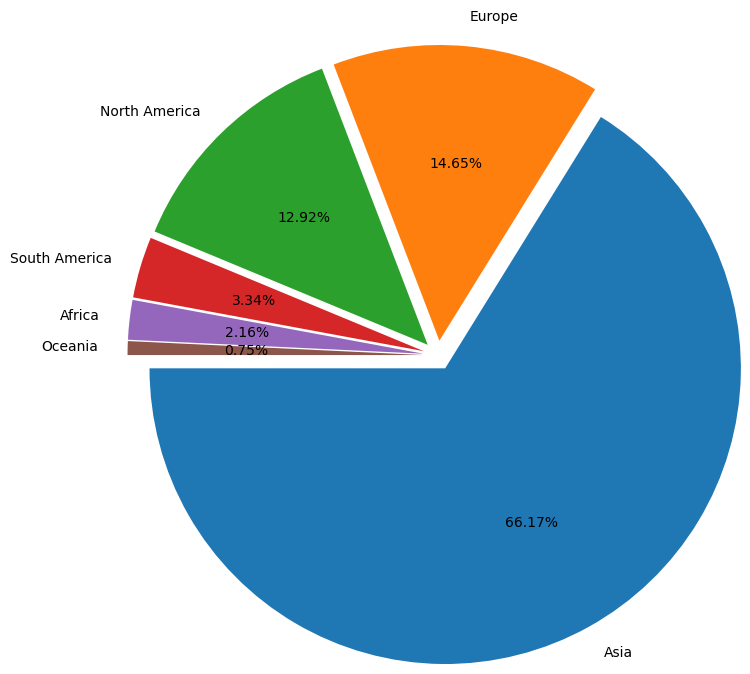

In [328]:
keys=visa_df['continent'].value_counts().keys()
values=visa_df['continent'].value_counts().values
plt.pie(values,labels=keys,autopct='%0.2f%%',startangle=180,explode=[0.1 for i in range(6)],radius=2)
plt.show()